# AI 1 - Assignment 2

This assignment requires you to install [Keras](https://keras.io/) and [Tensorflow](https://www.tensorflow.org). Keras is a high-level Deep Learning API, written in Python using TensorFlow, CNTK, or Theano as back-ends. Here, we will use Tensorflow as back-end.

This assignment is divided in two parts. In the first part you will learn about Keras with the help of the example below and the Keras [documentation](https://keras.io/). In the second part, you will practise training a Deep Learning model.

## How to submit
Submit this notebook with **plots**, **results** and **code** showing how the results were genereated. This assignment can either be submitted by dropping it in your student folder (on the Schulich NAS) or upload to it the CMD. Remember to name your files appropriately.
**Deadline** is on 17:30 on November 15, 2018.

## Installation
Instructions can be found here:
* [Keras](https://keras.io)
* [Tensorflow](https://www.tensorflow.org/install/)

I recommend using ```pip```. For Tensorflow is it sufficient to install the CPU version. The GPU version requires a good workstation with high-end Nvidia GPU(s), and it is not necessary for this assignment.

If you're using a virtualenv:
```
pip3 install keras
```
and 
```
pip3 install tensorflow
```
Add ```sudo``` for a systemwide installation (i.e. no ```virtualenv```).
```
sudo pip3 install keras
```
and 
```
sudo pip3 install tensorflow
```

## Part 1 - understand a model

### Optimizers

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater than zero. The goal of training a model is to find a set of weights and biases (i.e. parameters) that have, on average, a low loss across all examples. The term cost is used interchangably with loss. See the [loss section](https://keras.io/losses/) in the Keras documentation for a list and descriptions of what is available.

<img src="./LossSideBySide.png" width="500">
<figcaption>Figure. Left: high loss and right: low loss.</figcaption>

The optimizer is the algorithm used to minimize the loss/cost. Optimizers in neural networks work by finding the gradient/derivative of the loss with respect to the parameters (i.e. the weights). "Gradient" is the correct term since a we are looking at multi-dimensional systems (i.e. many parameters), however, the terms are often used interchangably. For those who didn't take multivariable calculus, just think of the gradient as a derivative. The derivative of the loss with respect to a parameters tells us how much the loss changes when we nudge a weight up or down. So, by knowing how a given parameter affects the loss the optimizer can change it so as to decrease the loss. The various optimizers differ in how they change the weights. 

#### Mini-overview over popular optimizers

* **Stochastic Gradient Descent (SGD)**. This is the most basic and easy to understand optimizer. It updates the weights in the negative direction of the gradient by taking the average gradient of mini-batch of data (e.g. 20-50 exemplars) in each step. Vanilla SGD only has one hyper-parameter, the learning rate.
* **Momentum**. This optimizer "gains speed" when the gradient has pointed in the same direction for several consecutive updates. That is, it gains momentum. It does this by accumulating an exponentially decaying moving average of past gradients. The step size depends on how large and aligned the sequence of gradients are. The most important hyper-parameter is alpha and common values are 0.5 and 0.9.
* **Nesterov Momentum**. This is a modification of the standard momentum optimizer.
* **AdaGrad**. This optimizer Ada-ptively sets the learning rate depending on the steepness/magnitude of the Grad-ients. This is done so that weights with big gradients get a smaller effective learning rate, and weights with small gradients will get a greater effective learning rate. The result is quicker progress in the more gently sloped directions of the weight space and a slowdown in stepp regions.
* **RMSProp**. This is modification of AdaGrad, where the accumulated gradient decays, that is, the influence of previous gradients gradually decreases.
* **Adam**. The name comes from "adaptive moments", and it is a combination of RMSProp and momentum. It has several hyper-parameters.

The above list just gives a quick overview of some of the most common. However, old optimizers are constantly improved and new are developed. SGD and momentum are most basic and easiest to understand and implement. They are still in use, but the more advanced optimizers tend to be better for practical use. Which one to use is generally an emperical question depending on both the data and the model.

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/), and to see what is available in Keras, see the [optimizer section](https://keras.io/optimizers/) of the documentation.

See the images below for a comparison of optimizers in a 2D space (NAG: Nesterov accelerated gradient, Adadelta: an extension of AdaGrad).

<img src="./contours_evaluation_optimizers.gif" width="500">
<img src="./saddle_point_evaluation_optimizers.gif" width="500">

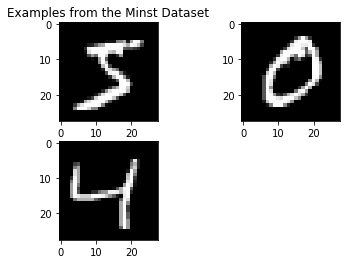

Rows of y [5 0 4 1 9]
Rows of y_oh after np.zeros transformation  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
import numpy as np
#from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.set_random_seed(2)

import numpy as np
tmp = np.load('mnist.npz')
X = tmp['X']
y = tmp['y']
X, y = X[:1000], y[:1000]

# To plot three examples from the dataset
plt.subplot(221)
plt.imshow(X[0], cmap=plt.get_cmap('gray'))
plt.title('Examples from the Minst Dataset')
plt.subplot(222)
plt.imshow(X[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X[2], cmap=plt.get_cmap('gray'))
plt.show()

# Reshape the X arrays
X = X.reshape(X.shape[0], 28, 28, 1)

# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

# Print out a few rows of y.
print('Rows of y', y[0:5] )
# Print out a few rows of y_oh.
print('Rows of y_oh after np.zeros transformation ', y_oh[0:5] )

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

### Question 1
**The data set**

Plot a three examples from the data set.
* What type of data are in the data set?
* What does the line ```X = X.reshape(X.shape[0], 28, 28, 1)``` do?

Look at how the encoding of the targets (i.e. ```y```) is changed. E.g. the lines
```
y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1
```
Print out a few rows of ```y``` next to ```y_oh```.
* What is the relationship between ```y``` and ```y_oh```?
* What is the type of encoding in ```y_oh``` called and why is it used?
* Plot three data examples in the same figure and set the correct label as title. 
    * It should be possible to see what the data represent.

In [14]:
# What type of data are in the data set?
# The mnist dataset contains numpy array data. Their are handwritten digit images represented by digits
# The training dataset X is structured as a 3-dimensional array of instance, image width and image height. 

# What does the line X = X.reshape(X.shape[0], 28, 28, 1) do?
# This line reshapes the original array to a 3D array, which has (28,28,1) in 3D array shape.

# What is the relationship between y and y_oh?
# y_oh is another representation of y.
# The index of value 1 in numpy array y_oh 
# is the same as the value of y

# What is the type of encoding in y_oh called and why is it used?
# One Hot Encoding. The response variables have ten different classes. Changing the 1 to 10 values into one hot encoding
# can make the loss funcion meaningful, because there is no point to compare the predicted value 
# with different numbers from 1 - 10.

### Question 2
**The model**

Below is some code for bulding and training a model with Keras.
* What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?
* What does ```Dropout()``` do?
* Which type of activation function is used for the hidden layers?
* Which type of activation function is used for the output layer?
* Why are two different activation functions used?
* What optimizer is used in the model below?
* How often are the weights updated (i.e. after how many data examples)?
* What loss function is used?
* How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?

In [10]:
# What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?
# CNN, Convolutional Neural Network

#What does Dropout() do?
# It's a regularization layer. 
# It is configured to randomly exclude a portion of neurons in the layer in order to reduce overfitting.

# Which type of activation function is used for the hidden layers?
# A rectifier activation function (Relu)

# Which type of activation function is used for the output layer?
# A softmax activation function

# Why are two different activation functions used?
# They have different functions in the convolutional neural network.
# In the input layer, a rectifier activation funciton serves to forward propagate the signal from the input layer through the network.
# It's main purpose it to convert a input signal of a node to an output signal, which will be used as an input signal in the next layer.
# In the output layer, a softmax activation function serves to output probability-like predictions for each class.
# Softmax function is good for classification, while Relu function is not.

# What optimizer is used in the model below?
# Stochatic Gradient Descent is used to learn the weights.

# How often are the weights updated (i.e. after how many data examples)?
# The model is fit over 60 epochs with updates every 32 data examples.
# In this network, it takes the first 32 examples from the training dataset and trains the network.
# It keeps doing this procedure until we have propagated through all samples of the network.
# In this network, we have 25 batches. We update the weights after each propagation.

# What loss function is used?
# Logarithmic loss (categorical crossentropy)

# How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?
# The total parameters are 108,618. The result can be obtained by model.summary

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import tensorflow
import timeit
%matplotlib inline
import matplotlib.pyplot as plt


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

# To see how many parameters are in the model
model.summary()

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0]) 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               102528    
__________

## Part 2 - train a model

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Here you will get to explore some of the factors that affect model performance. Much of the skill in training deep learning models lies in quickly finding good values/options for these choises.

In order to observe the learning process it is best to compare the training set loss with the loss on the test set. How to visualize these variables in Keras is described under [Training history visualization](https://keras.io/visualization/#training-history-visualization) in the documentation.

You will explore the effect of 1) optimizer, 2) training duration, and 3) dropout (see the question above).

When training, an **epoch** is one pass through the full training set.

### Question 3

* **Vizualize the training**. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss? 
    * Remember to first reset the weights (```model.reset_states()```), otherwise the training just continues from where it was stopped earlier.

* **Optimizer**. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.
    * *NOTE* that how long the training takes varies with optimizer. I.e., make sure that the model is trained for long enough to reach optimal performance.

* **Dropout**. Use the best optimizer and do hyper-parameter seach and find the best value for ```Dropout()```.

* **Best model**. Combine the what you learned from the above three questions to build the best model. How much better is it than the worst and average models?

* **Results on the test set**. When doing this search for good model configuration/hyper-parameter values, the data set was split into *two* parts: a training set and a test set (the term "validation" was used interchangably wiht "test"). For your final model, is the performance (i.e. accuracy) on the test set representative for the performance one would expect on a previously unseen data set (drawn from the same distribution)? Why?


**Good luck!**

In [ ]:
# The answers of questions 3 are as follows:

# Vizualize the training: Visualization.ipynb
# The optimal number of epochs for minimizing the test set loss is 8 or 9.

# Optimizer
# a) Adam, Adagrad, Adadelta
# b) best learning rate for these optimizers are respectively 
# c) The codes that search for the optimal learning rates and the results
# are in the files below:
# Adam: Adam_clr.ipynb Adam_Optimal.ipynb
# Adagrad: Adagrad_clr.ipynb Adagrad_Optimal.ipynb
# Adadelta: Adadelta_clr.ipynb Adadelta_Optimal.ipynb
# as well as a module file imported for cyclical learning rate search: 
# clr_callback.py
# Please put this file in the local working directory when you run the files above.

# The method I used to search for optimal learning rate for different optimizers
# is called Cyclical Learning Rates Policy (CLR) and LR Range test.
# This website introduces this method: 
# https://www.jeremyjordan.me/nn-learning-rate/

# The paper 'Cyclical Learning Rates for Training Neural Networks', Leslie Smith 
# first proposes a cyclical learning rate schedule 
# https://arxiv.org/abs/1506.01186 

# Cyclical Learning Rates (CLR) has the following advantages:
# CLR allows the model to be trained on higher learning rates and converge faster;
# During the middle of learning when learning rate is higher, the learning rate
# works as regularisation method and keep network from overfitting.
# This helps the network to avoid steep areas of loss and land better flatter minima.

# The intuition behind this method is that
# The optimal learning rate can yield significant decreases in the loss function.
# A systematic approach in finding such learning rate is by observing the magnititudes
# of loss change with different learning rates.
# Using CLR for the learning rates schedule, I plot the graph of the change in 
# loss function as the learning rates change.
# The d/loss minimum in the graph is the point when 
# the optimal learning rate can yield significant decreases in the loss function.

# Dropout: Dropout_opt.ipynb
# Best model: Best_Model.ipynb
# I choose Adam optimizer to build a best model because it can achieve high accuracy
# with shorter time (in seconds) than Adadelta and Adagrad optimizer.

# Results on the test set: Best_Model.ipynb